In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline
np.set_printoptions(precision=2)
pd.set_option('precision', 2)
np.set_printoptions(suppress=True)
sns.set(style='whitegrid')

In [2]:
#1. Load training and test datasets

train_path = 'data/train.csv'
test_path = 'data/test.csv'
train_data = pd.read_csv(train_path, index_col='PassengerId')
test_data = pd.read_csv(test_path, index_col='PassengerId')

#1a. Seperate features and target from training dataset.

features = train_data.iloc[:,1:]
target = train_data.loc[:, ['Survived']]
print('Train Set Size : ', train_data.shape)
print('Test Set Size : ', test_data.shape)
print('Train Features Size : ', features.shape)
num_train_rows = train_data.shape[0]
num_test_rows = test_data.shape[0]

#1b. Merge training and test datasets to cover all 
#encodings for categorical features

all_data = pd.concat((features, test_data)).reset_index(drop=True)

Train Set Size :  (891, 11)
Test Set Size :  (418, 10)
Train Features Size :  (891, 10)


In [3]:
#2. Find Columns that have Missing Data

null_features = all_data.columns[all_data.isnull().any()]
missing_ratio = (all_data[null_features].isnull().sum()/len(all_data)) * 100
missing_data = pd.DataFrame({'Missing Ratio' :missing_ratio})
print(missing_data.sort_values(by='Missing Ratio',ascending=False))

          Missing Ratio
Cabin             77.46
Age               20.09
Embarked           0.15
Fare               0.08


c:\users\revan\appdata\local\programs\python\python36\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\users\revan\appdata\local\programs\python\python36\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


assenger class :  1
Common fare in above passenger class :  26.55
assenger class :  2
Common fare in above passenger class :  13.0
assenger class :  3
Common fare in above passenger class :  8.05


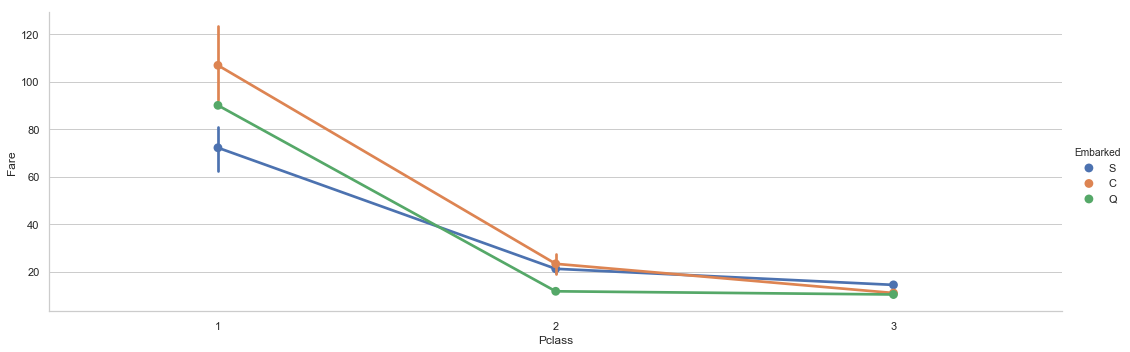

In [4]:
#3. Fill Missing Data

#3a. Since fare changes as per passenger class, 
#select mode of Pclass and assign it to missing fare values.

sns.factorplot(x="Pclass", y="Fare", hue='Embarked', data=all_data, size=5, aspect=3)
Pclass_groupby_obj = all_data.groupby(['Pclass'])['Fare']
for name, group in Pclass_groupby_obj:
    print('assenger class : ', name)
    print('Common fare in above passenger class : ', group.mode()[0])

all_data['Fare'] = \
    all_data.groupby(['Pclass'])['Fare'].apply(lambda x : x.fillna(x.mode()[0]))


#3b. Fill missing Embarked values

all_data['Embarked'] = all_data['Embarked'].fillna(all_data['Embarked'].mode()[0])

#3c. Create a new column FAMILYSIZE that combines parents, spouse and siblings
all_data['FamilySize'] = all_data['Parch'] + all_data['SibSp']

#3d. I observed that NAME column contains Title such as Mr, Miss, Master etc
# Derive TITLE from NAME and select mode of each group 
# and assign it to missing Age values in that group.

title = []
for index, row in all_data.iterrows():
    title.append(row.Name.split(',')[1].split('.')[0].strip())
all_data['Title'] = title

#replace various titles with more common titles
all_data.loc[all_data['Title']=='the Countess', 'Title'] = 'Royal'
all_data.loc[all_data['Title']=='Lady', 'Title'] = 'Royal'
all_data.loc[all_data['Title']=='Sir', 'Title'] = 'Royal'
all_data.loc[all_data['Title']=='Capt', 'Title'] = 'Rare'
all_data.loc[all_data['Title']=='Col', 'Title'] = 'Rare'
all_data.loc[all_data['Title']=='Don', 'Title'] = 'Rare'
all_data.loc[all_data['Title']=='Dr', 'Title'] = 'Rare'
all_data.loc[all_data['Title']=='Major', 'Title'] = 'Rare'
all_data.loc[all_data['Title']=='Rev', 'Title'] = 'Rare'
all_data.loc[all_data['Title']=='Jonkheer', 'Title'] = 'Rare'
all_data.loc[all_data['Title']=='Dona', 'Title'] = 'Rare'
all_data.loc[all_data['Title']=='Mlle', 'Title'] = 'Miss'
all_data.loc[all_data['Title']=='Ms', 'Title'] = 'Miss'
all_data.loc[all_data['Title']=='Mme', 'Title'] = 'Rare'

pd.crosstab(all_data['Title'], all_data['Sex'])
#1,2, 4, 9 all have same counts. So, choosen 1 for master age mode
master_age_mode = all_data.loc[all_data['Title']=='Master', 'Age'].mode()[0]
miss_age_mode = all_data.loc[all_data['Title']=='Miss', 'Age'].mode()[0]
mr_age_mode = all_data.loc[all_data['Title']=='Mr', 'Age'].mode()[0]
mrs_age_mode = all_data.loc[all_data['Title']=='Mrs', 'Age'].mode()[0]
rare_age_mode = all_data.loc[all_data['Title']=='Rare', 'Age'].mode()[0]
royal_age_mode = all_data.loc[all_data['Title']=='Royal', 'Age'].mode()[0]

all_data['Age'] = \
    all_data.groupby(['Title'])['Age'].apply(lambda x : x.fillna(x.mode()[0]))

In [5]:
#3d. Drop unnecessary columns and
#    Confirm that all columns have no missing values

all_data.drop(columns = ['Name', 'Ticket', 'Title', 'Cabin', 'Parch', 'SibSp', 'Fare'], inplace=True)


null_features = all_data.columns[all_data.isnull().any()]
missing_ratio = (all_data[null_features].isnull().sum()/len(all_data)) * 100
missing_data = pd.DataFrame({'Missing Ratio' :missing_ratio})
print(missing_data.sort_values(by='Missing Ratio',ascending=False))

all_data = all_data.replace('female', 0)
all_data = all_data.replace('male', 1)
all_data = all_data.replace('C', 0)
all_data = all_data.replace('Q', 1)
all_data = all_data.replace('S', 2)

all_data.info()

Empty DataFrame
Columns: [Missing Ratio]
Index: []
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 5 columns):
Pclass        1309 non-null int64
Sex           1309 non-null int64
Age           1309 non-null float64
Embarked      1309 non-null int64
FamilySize    1309 non-null int64
dtypes: float64(1), int64(4)
memory usage: 51.2 KB


In [7]:
'''
            4. Random Forest with default parameters
'''

train_features = all_data[:num_train_rows]
test_features = all_data[num_train_rows:]

from sklearn.cross_validation import train_test_split
X_train , X_test, y_train, y_test = train_test_split(train_features, target, test_size=0.2, random_state=0)


from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state=0, max_features=None)
classifier.fit(X_train , y_train)

print('Accuracy : ', classifier.score(X_test, y_test))

from sklearn.metrics import confusion_matrix
y_predict = classifier.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_predict)
print(conf_matrix)

Accuracy :  0.7988826815642458
[[94 16]
 [20 49]]


c:\users\revan\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [8]:
'''
            5. Hyper Parameter Tuning
'''

num_tree_list = np.linspace(5, 150, 25, endpoint=True, dtype=int)
max_depth_list = np.linspace(4, 16, 7, endpoint=True, dtype=int)
min_samples_split_list=np.linspace(0.01, 0.1, 9, endpoint=False)
min_samples_leaf_list=np.linspace(0.01, 0.1, 5, endpoint=True)

random_grid = {'n_estimators': num_tree_list, 
               'max_depth': max_depth_list, 
               'min_samples_split': min_samples_split_list, 
               'min_samples_leaf': min_samples_leaf_list}

from sklearn.model_selection import RandomizedSearchCV
random_regr = RandomForestClassifier(random_state=0)
rf_random = RandomizedSearchCV(estimator = random_regr, 
                param_distributions = random_grid, 
                n_iter = 200, cv = 5, verbose=2, 
                random_state=0, n_jobs = -1)
rf_random.fit(X_train , y_train)
print(rf_random.best_params_)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done 539 tasks      | elapsed:   16.7s
[Parallel(n_jobs=-1)]: Done 985 out of 1000 | elapsed:   26.6s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   26.9s finished
c:\users\revan\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'n_estimators': 47, 'min_samples_split': 0.04000000000000001, 'min_samples_leaf': 0.01, 'max_depth': 14}


In [9]:
'''
            6. Random Forest with Optimal parameters
'''

classifier =  RandomForestClassifier(random_state=0, min_samples_split=0.04, 
                        min_samples_leaf=0.01, max_depth=14, n_estimators=47)
classifier.fit(X_train , y_train)

print('Accuracy : ', classifier.score(X_test, y_test))

from sklearn.metrics import confusion_matrix
y_predict = classifier.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_predict)
print(conf_matrix)

Accuracy :  0.8156424581005587
[[101   9]
 [ 24  45]]


c:\users\revan\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
